In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from census import Census
from us import states
import functions

In [2]:
master_df = pd.read_csv('resources/MasterData200730.csv')
master_df = master_df.drop(columns="Unnamed: 0")

In [3]:
master_df.head()

,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv
0,Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47,38.21,33,49,50,3,17,1,0
1,Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45,39.35,46,39,43,5,4,11,7
2,Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49,36.61,50,29,23,1,0,21,27
3,Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21,52.92,27,12,34,29,23,38,16
4,California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5,63.14,4,24,12,45,46,26,38


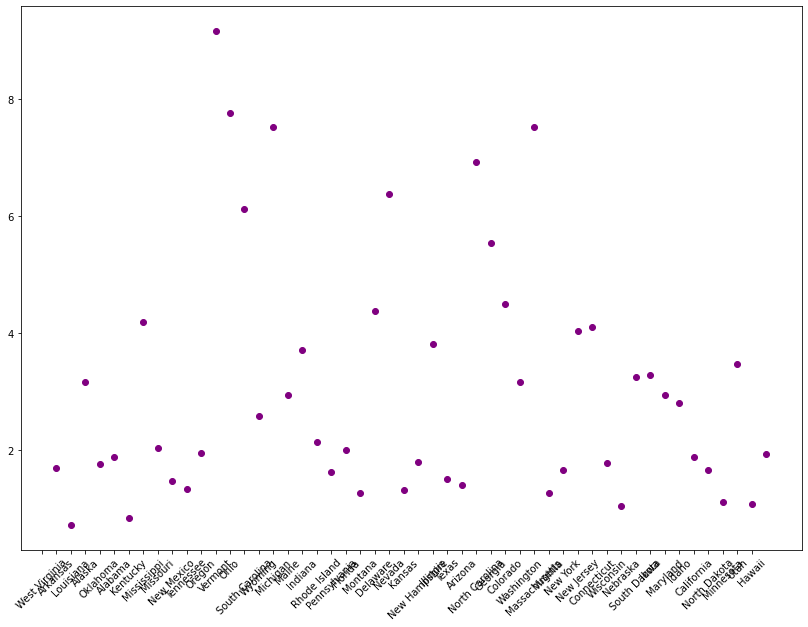

In [4]:
# Scatter Plot
# Make xtick labels = State names
# Increase figure size
plt.figure(figsize=(14, 10))
plt.scatter( master_df["Happiness Rank"], 
            master_df["Mortality Rate"], 
            c="purple"
           )
plt.xticks(ticks=master_df["Happiness Rank Inv"], labels=master_df["State"], rotation=45)
plt.show()


In [5]:
master_df = master_df.set_index('State')
master_df['State Population'] = ''


In [10]:
master_df.head()

,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv,State Population
State,,,,,,,,,,,,,,,,
Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47,38.21,33,49,50,3,17,1,0,0
Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45,39.35,46,39,43,5,4,11,7,
Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49,36.61,50,29,23,1,0,21,27,
Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21,52.92,27,12,34,29,23,38,16,
California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5,63.14,4,24,12,45,46,26,38,


In [11]:

c = Census("661e1f2142e1cf49fc3ccb14fbef9446886ea826")
state_pop_data = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'state:*'})
print(state_pop_data)

for item in state_pop_data:
    pop = item['B01003_001E']
    name = item['NAME']
    master_df.loc[name, "State Population"] = pop

master_df.head(10)

[{'NAME': 'Minnesota', 'B01003_001E': 5527358.0, 'state': '27'}, {'NAME': 'Mississippi', 'B01003_001E': 2988762.0, 'state': '28'}, {'NAME': 'Missouri', 'B01003_001E': 6090062.0, 'state': '29'}, {'NAME': 'Montana', 'B01003_001E': 1041732.0, 'state': '30'}, {'NAME': 'Nebraska', 'B01003_001E': 1904760.0, 'state': '31'}, {'NAME': 'Nevada', 'B01003_001E': 2922849.0, 'state': '32'}, {'NAME': 'New Hampshire', 'B01003_001E': 1343622.0, 'state': '33'}, {'NAME': 'New Jersey', 'B01003_001E': 8881845.0, 'state': '34'}, {'NAME': 'New Mexico', 'B01003_001E': 2092434.0, 'state': '35'}, {'NAME': 'New York', 'B01003_001E': 19618453.0, 'state': '36'}, {'NAME': 'North Carolina', 'B01003_001E': 10155624.0, 'state': '37'}, {'NAME': 'North Dakota', 'B01003_001E': 752201.0, 'state': '38'}, {'NAME': 'Ohio', 'B01003_001E': 11641879.0, 'state': '39'}, {'NAME': 'Oklahoma', 'B01003_001E': 3918137.0, 'state': '40'}, {'NAME': 'Oregon', 'B01003_001E': 4081943.0, 'state': '41'}, {'NAME': 'Pennsylvania', 'B01003_001E'

,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv,State Population
State,,,,,,,,,,,,,,,,
Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47.0,38.21,33.0,49.0,50.0,3.0,17.0,1.0,0.0,738516
Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45.0,39.35,46.0,39.0,43.0,5.0,4.0,11.0,7.0,4.86468e+06
Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49.0,36.61,50.0,29.0,23.0,1.0,0.0,21.0,27.0,2.99067e+06
Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21.0,52.92,27.0,12.0,34.0,29.0,23.0,38.0,16.0,6.94668e+06
California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5.0,63.14,4.0,24.0,12.0,45.0,46.0,26.0,38.0,3.91488e+07
Colorado,CO,2020-07-25 07:10:21,476586.0,42980.0,1598.0,3.718008,18.0,55.38,19.0,3.0,46.0,32.0,31.0,47.0,4.0,5.53114e+06
Connecticut,CT,2020-07-22 05:16:54,660857.0,48096.0,4406.0,9.160845,12.0,58.24,9.0,40.0,18.0,38.0,41.0,10.0,32.0,3.5815e+06
Delaware,DE,2020-07-22 05:16:54,158347.0,13746.0,525.0,3.819293,27.0,51.67,17.0,37.0,45.0,23.0,33.0,13.0,5.0,949495
Florida,FL,2020-07-25 07:23:41,3276636.0,402312.0,5653.0,1.405128,29.0,51.01,20.0,20.0,47.0,21.0,30.0,30.0,3.0,2.05981e+07


In [12]:
master_df.to_csv('Resources/MasterData200730.csv')

In [13]:
deaths_per_pop = master_df["Deaths"] / master_df["State Population"].astype('float64') * 1000000
deaths_per_pop = deaths_per_pop.dropna()
master_df = master_df.dropna()

R-squared: 0.022397


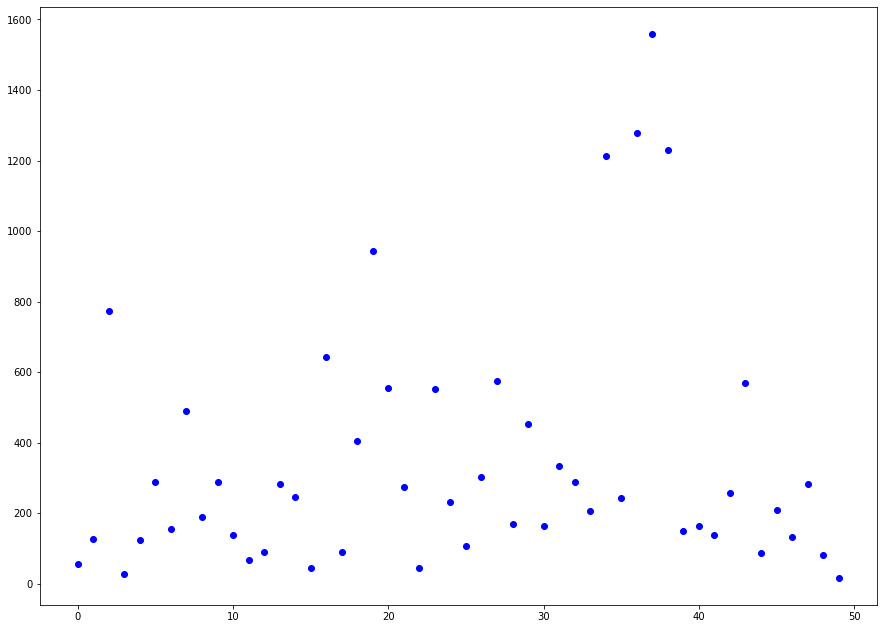

In [17]:
plt.figure(figsize=(15, 11))
slope, intercept, r_value, p_value, std_err = linregress(master_df["Happiness Rank Inv"], deaths_per_pop)
print("R-squared: %f" % r_value**2)
plt.scatter( master_df["Happiness Rank Inv"], 
             deaths_per_pop, 
             c="blue"
           )
plt.show()